# MNIST

In [1]:
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms

from src.data import MNIST
from src.models import LeNet
from src.training.config import TrainingConfig
from src.training import ModelTrainer
import matplotlib.pyplot as plt

In [2]:
training_config = TrainingConfig(batch_size=100, lr=0.0001)

In [3]:
model = LeNet()

In [4]:
transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [5]:
training_data = MNIST(train=True, root='./data', transform=transform)
testing_data = MNIST(train=False, root='./data', transform=transform)

C:\Users\raghu\anaconda3\envs\CV\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [6]:
len(training_data), len(testing_data)

(60000, 10000)

In [7]:
model_trainer = ModelTrainer(
    model,
    optim.Adam,
    nn.CrossEntropyLoss(),
    training_config,
    training_data,
    cuda=True,
    validation_data=testing_data
)

using NVIDIA GeForce GTX 1060


In [8]:
training_metrics, testing_metrics = model_trainer.train(10, True)

C:\Users\raghu\anaconda3\envs\CV\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


training metrics:   epoch: 0            loss: 0.588324301900963       accuracy: 84.21               
testing metrics:    epoch: 0            loss: 0.18643051460385324     accuracy: 94.5                
training metrics:   epoch: 1            loss: 0.14885117702186107     accuracy: 95.64166666666667   
testing metrics:    epoch: 1            loss: 0.1016111133620143      accuracy: 96.85               
training metrics:   epoch: 2            loss: 0.09786805480408171     accuracy: 97.13               
testing metrics:    epoch: 2            loss: 0.07525796432979405     accuracy: 97.66               
training metrics:   epoch: 3            loss: 0.07631667819184562     accuracy: 97.725              
testing metrics:    epoch: 3            loss: 0.062078393250703814    accuracy: 98.06               
training metrics:   epoch: 4            loss: 0.06373392862578232     accuracy: 98.09166666666667   
testing metrics:    epoch: 4            loss: 0.04973903632722795     accuracy: 98.46      

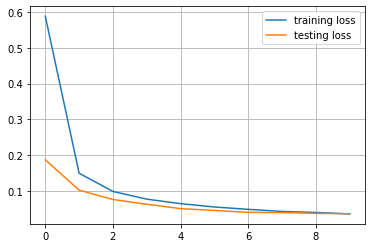

In [9]:
plt.figure(facecolor='white')
plt.plot(training_metrics.losses, label='training loss')
plt.plot(testing_metrics.losses, label='testing loss')
plt.grid()
plt.legend()

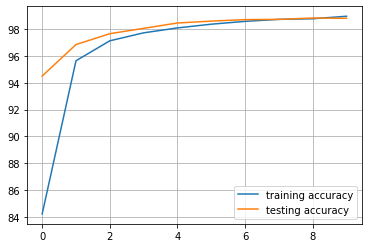

In [10]:
plt.figure(facecolor='white')
plt.plot(training_metrics.accuracies, label='training accuracy')
plt.plot(testing_metrics.accuracies, label='testing accuracy')
plt.grid()
plt.legend()

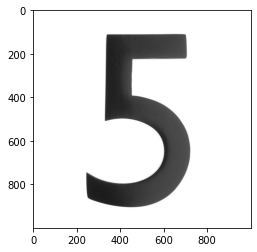

In [11]:
import requests
from PIL import Image, ImageOps

url = 'https://images.homedepot-static.com/productImages/007164ea-d47e-4f66-8d8c-fd9f621984a2/svn/architectural-mailboxes-house-letters-numbers-3585b-5-64_1000.jpg'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img)

In [12]:
def preprocess(img: Image):
    img = ImageOps.invert(ImageOps.grayscale(img))
    img = img.convert('1')
    
    return img

In [13]:
model_trainer.predict(img, transform, preprocess)

5